<a href="https://colab.research.google.com/github/Kitagawa-Mariin/HenryPark_Python/blob/Machine_Learning/8_2_Convolution_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
# input image must have the depth dimension. 흑백사진이기 때문에 1.
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0 #-1 : all, 28,28,1 3d dimension of 28 28 picture.
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [ ]:
#첫번째 합성곱 층
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

model.add(keras.layers.MaxPooling2D(2))
#2,2 풀링을 적용했기 때문에, 특성 맵의 크기는 절반으로 줄어든다. (14, 14, 32)

#두번째 합성곱 층
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
(7,7,64)

#차원 특성 맵을 일렬로 펼치기. 마지막 10개의 뉴ㅜ런을 가진 출력층에서 확률 계산.
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4)) #과대적합 막음.
model.add(keras.layers.Dense(10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_16 (Dense)            (None, 100)              

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_16 (Dense)            (None, 100)              

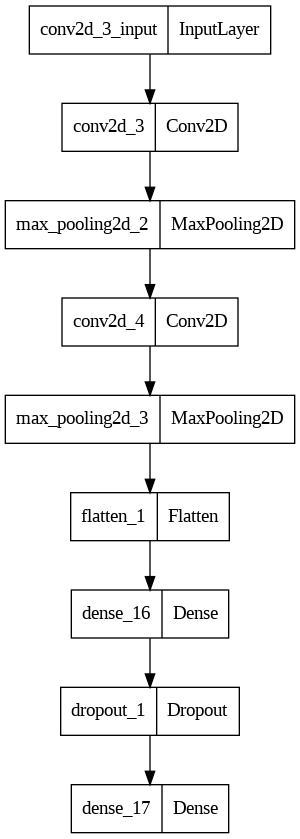

In [ ]:
keras.utils.plot_model(model)

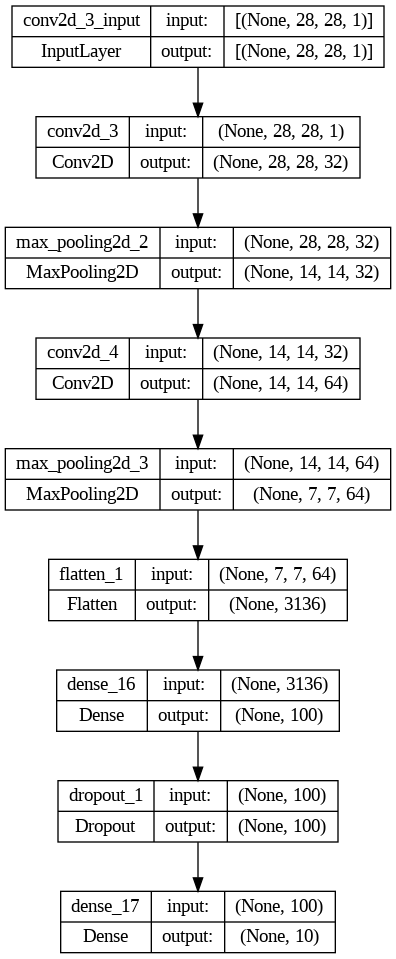

In [ ]:
keras.utils.plot_model(model, show_shapes=True) #to_file 매개변수에 파일 이름을 지정하면 출력한 이미지를 파일로
#dpi 매개변수로 해상도 지정.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 66s 43ms/step - loss: 0.5363 - accuracy: 0.8094 - val_loss: 0.3333 - val_accuracy: 0.8780
Epoch 2/20
   2/1500 [..............................] - ETA: 1:31 - loss: 0.3434 - accuracy: 0.8750

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 61s 41ms/step - loss: 0.3544 - accuracy: 0.8742 - val_loss: 0.2939 - val_accuracy: 0.8934
Epoch 3/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.3049 - accuracy: 0.8891 - val_loss: 0.2590 - val_accuracy: 0.9011
Epoch 4/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.2712 - accuracy: 0.9023 - val_loss: 0.2460 - val_accuracy: 0.9096
Epoch 5/20
1500/1500 [==============================] - 68s 45ms/step - loss: 0.2417 - accuracy: 0.9113 - val_loss: 0.2423 - val_accuracy: 0.9080
Epoch 6/20
1500/1500 [==============================] - 73s 48ms/step - loss: 0.2232 - accuracy: 0.9187 - val_loss: 0.2335 - val_accuracy: 0.9142
Epoch 7/20
1500/1500 [==============================] - 88s 59ms/step - loss: 0.2056 - accuracy: 0.9251 - val_loss: 0.2203 - val_accuracy: 0.9202
Epoch 8/20
1500/1500 [==============================] - 70s 46ms/step - loss: 0.1889 - accuracy: 0.9294 - val_loss: 0.2212 - val_accura

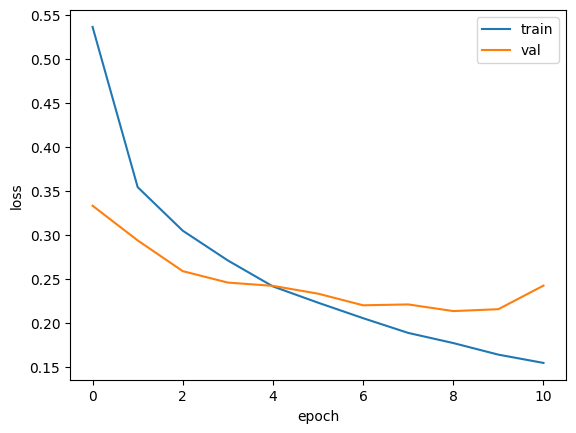

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
#earlystopping 클래스에서 restore_best_weights 매개변수를 True로 지정했으므로, 현재 model 객체가 최적의 모델 파라미터로 복원됨.

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 4s 11ms/step - loss: 0.2137 - accuracy: 0.9246


[0.21367894113063812, 0.9245833158493042]

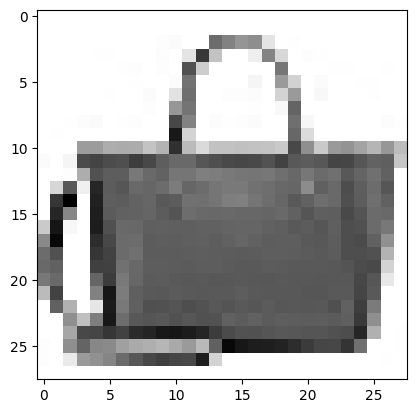

In [ ]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [ ]:
preds = model.predict(val_scaled[0:1])
print(preds)
#아홉 번째 값이 1, 다른 값은 거의 0

1/1 [==============================] - 0s 81ms/step
[[9.9413928e-15 5.8737800e-26 1.7024235e-19 5.3043717e-19 3.1115893e-19
  6.3923988e-16 8.5957375e-18 1.0194883e-18 1.0000000e+00 3.2740019e-21]]


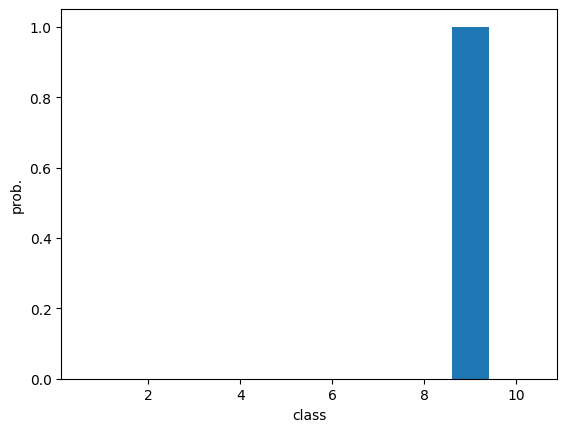

In [ ]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [ ]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 5s 16ms/step - loss: 0.2410 - accuracy: 0.9168


[0.24096935987472534, 0.9168000221252441]

***합성곱의 시각화***

In [ ]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [ ]:
model.layers

In [ ]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape) # 3,3,1 커널 32개
#weight 2번째 원소: 절편 수. 필터마다 있기때문에 32

conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

(3, 3, 1, 32) (32,)
-0.03987225 0.28409296


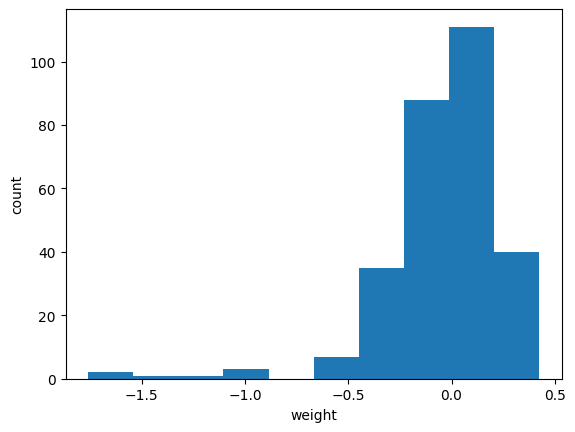

In [ ]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1)) #히스토그램을 그리기 위해 1차원 배열
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

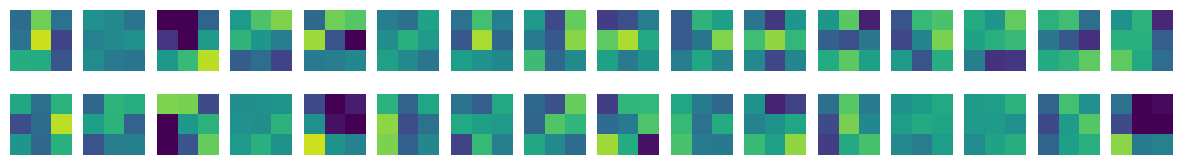

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    #conv_weight[:,:,0,0]에서 ][:,:,0,31]까지 출력.
    #vmin vmax로 맷플롯립의 컬러맵으로 표현할 범위를 지정.

    axs[i, j].axis('off')
plt.show() #최댓값이면 가장 밝은 노란색.

In [ ]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=
                                          'relu', padding='same', input_shape=(28,28,1)))

In [ ]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)


(3, 3, 1, 32)


In [ ]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0042571607 0.085620895


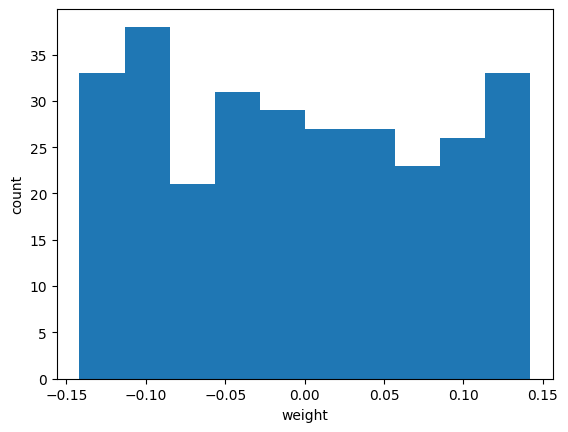

In [ ]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()
#텐서플로가 신경망의 가중치를 처음 초기화할 때 균등 분포에서 랜덤하게 값을 선택.

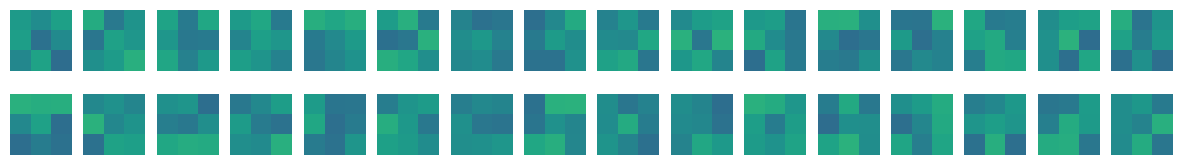

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    #conv_weight[:,:,0,0]에서 ][:,:,0,31]까지 출력.
    #vmin vmax로 맷플롯립의 컬러맵으로 표현할 범위를 지정.
    axs[i, j].axis('off')
plt.show() #최댓값이면 가장 밝은 노란색.

***함수형 API Functional API***

좀 더 복잡한 모델. 입력이 2개일 수도 있고 출력이 2개일 수도 있다.


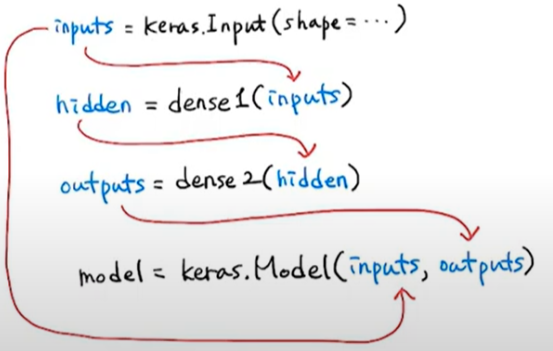

In [ ]:
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

#inputs = keras.Input(shape=(784,))

#hidden = dense1(inputs) #객체를 함수처럼 호출했을 때도 적절히 동작가능.
#Inputs를 Dense층에 통과시킨 후 출력값 hidden을 만들어 준다.

#outputs = dense2(hidden)

#model = keras.Model(inputs, outputs)

#inputs은 어디서 왔나??????????

print(model.input) #


KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_3_input'), name='conv2d_3_input', description="created by layer 'conv2d_3_input'")


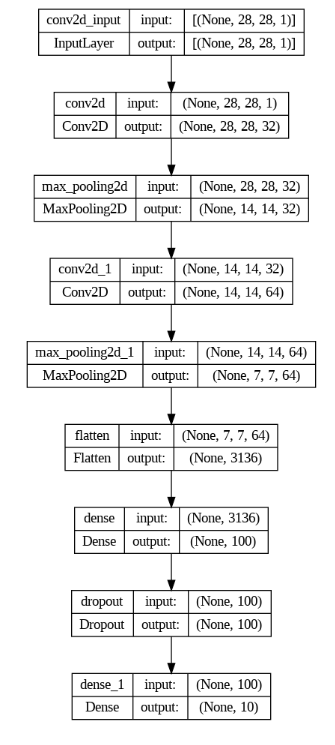

우리는 첫번째 conv2d 만 원함! model.input을 통해 모델의 입력을 얻을 수 있다. conv2d의 아웃풋은? model.layers[0].output 첫번째 레이어의 아웃풋.

In [ ]:
conv_acti = keras.Model(model.input, model.layers[0].output)
#첫번째 conv2d만 쏙 빼서 왔다!

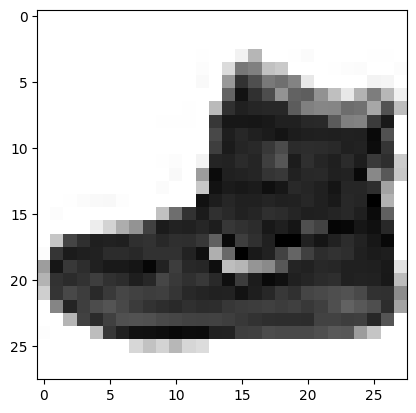

(28, 28)


In [ ]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()
print(train_input[0].shape)

In [ ]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)
#predict() 메소드는 항상 입력의 첫번째 차원이 배치 차원일 것으로 기대. (784,) 크기를 (28,28,1) 크기로 변경.

1/1 [==============================] - 0s 74ms/step


In [ ]:
print(feature_maps.shape)
#세임 패딩과 32개의 필터를 사용한 합성곱 층의 출력. (28,28,32) 첫번째 차원은 배치 차원. 샘플을 하나 입력했기 때문에 1.

(1, 28, 28, 32)


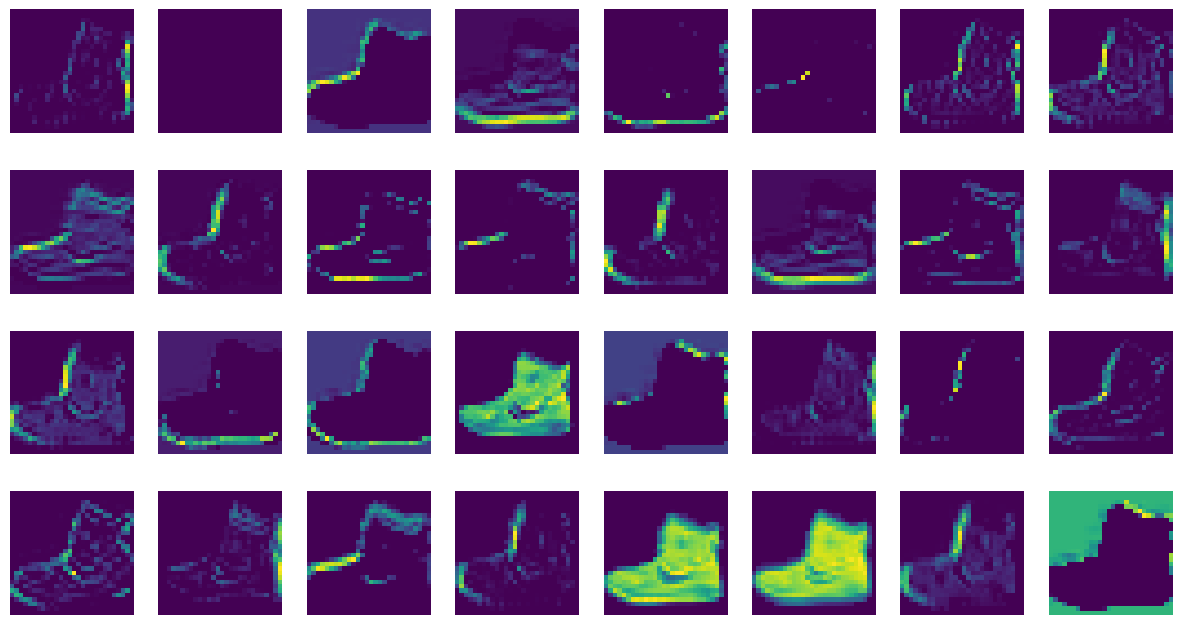

In [ ]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show() #첫번째 필터 뒷라인 감지. ... 등 합성곱의 시각화!

In [ ]:
#두번째 필터
conv2_acti = keras.Model(model.input, model.layers[2].output)
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_3_input'), name='conv2d_3_input', description="created by layer 'conv2d_3_input'")


1/1 [==============================] - 0s 201ms/step


In [ ]:
print(feature_maps.shape)

(1, 14, 14, 64)


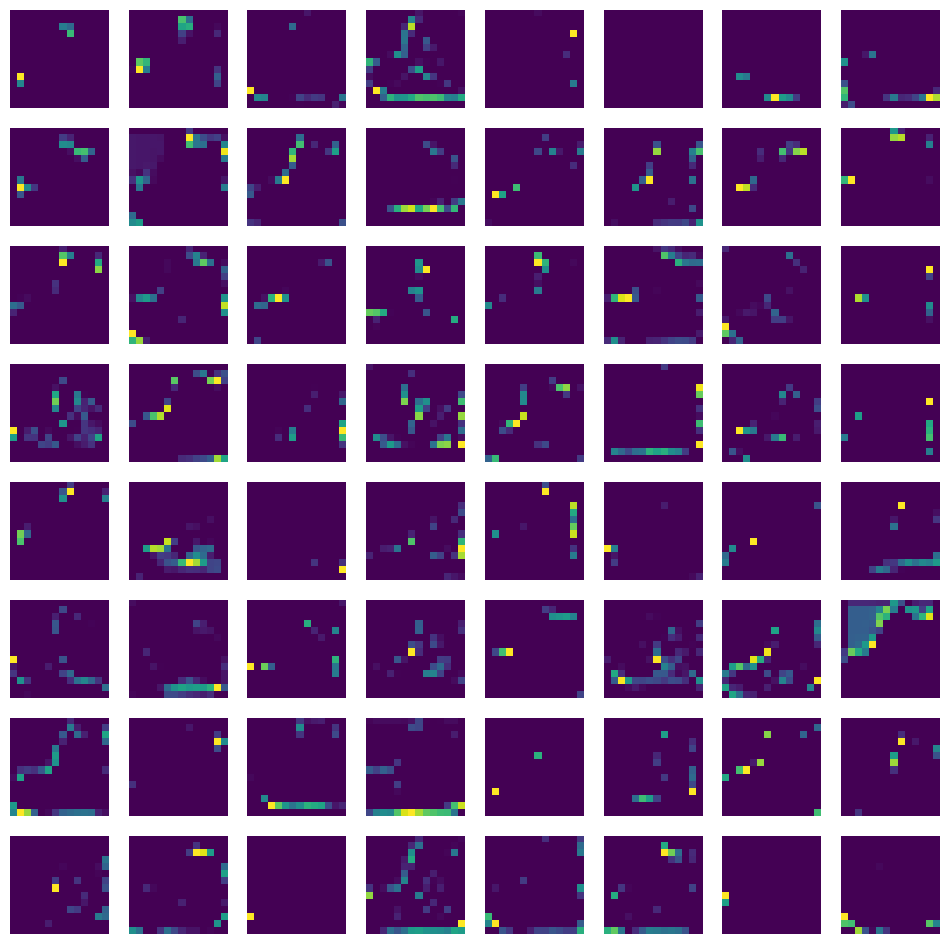

In [ ]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show()